In [ ]:
#Name : Sriram Varma Kalidindi 
#ID.  : 1001974638  
#Compiler : JupyterNotebook

In [ ]:
#Get the Titanic data set on Canvas (or find a different copy). This data set 
#has been over studied, over analyzed. The questions:  
 
#Which people most likely survived?  
#Young/Old/Middle?  
#Female/Male?  
#Rich/Poor?    
 
#Use some of the techniques/methods in Chap 2 (and perhaps Chap 3 or 1) in the text 
#(or notes) to try to answer these questions. 

In [1]:
#METHOD 1: SIMPLE PERCENTAGE CALCULATION 
#Q: Which people most likely survived?
import math
import pandas as pd

df = pd.read_csv('./Titanic.csv')
def get_column(condition):
    return df.loc[condition]['Survived']
#Young/Old/Middle?
y = df.loc[(df.Age < 30)]['Survived']
m = df.loc[((df.Age >= 30) & (df.Age < 50))]['Survived']
o = df.loc[(df.Age >= 50)]['Survived']
#Female/Male?
m = df.loc[(df.Sex == 'male')]['Survived']
f = df.loc[(df.Sex == 'female')]['Survived']
#Rich/Poor?
r = df.loc[(df.Pclass == 1)]['Survived']
p = df.loc[(df.Pclass > 1)]['Survived']
print(f'{math.floor(sum(y)/len(y)*100)}% of young people survived(age < 30)')
print(f'{math.floor(sum(m)/len(m)*100)}% of middle aged people survived(age 30<age<50)')
print(f'{math.floor(sum(o)/len(o)*100)}% of old people survived(age>50)')
print('Most likely survivors: middle aged')
print(f'{math.floor(sum(m)/len(m)*100)}% of male people survived')
print(f'{math.floor(sum(f)/len(f)*100)}% of female people survived')
print('Most likely survivors: female')
print(f'{math.floor(sum(r)/len(r)*100)}% of rich people survived')
print(f'{math.floor(sum(p)/len(p)*100)}% of poor people survived')
print('Most likely survivors: rich')

40% of young people survived(age < 30)
18% of middle aged people survived(age 30<age<50)
36% of old people survived(age>50)
Most likely survivors: middle aged
18% of male people survived
74% of female people survived
Most likely survivors: female
62% of rich people survived
30% of poor people survived
Most likely survivors: rich


In [ ]:
#METHOD 2: BASIC DATA ANALYSIS OF WHICH PEOPLE MOST LIKELY SURVIVED(GRAPHICAL REPRESENTATION OF DATA)
#Q: Which people most likely survived?
#Basic Data Analysis, feature engineering, and used some of the popular models for prediction.
#Predicted whether a passenger survived or not. 0 for not survived, 1 for survived.

In [2]:
#Step 1: Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Step 2: Reading the data
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
#Step 3: Data Exploration
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
# seperate the data into numeric and categorical
df_numeric = training[['Age','SibSp','Parch','Fare']]
df_categorical = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

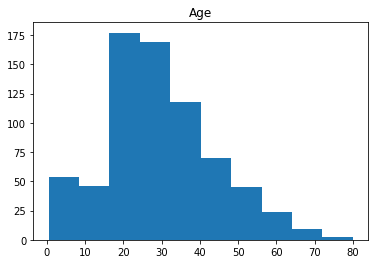

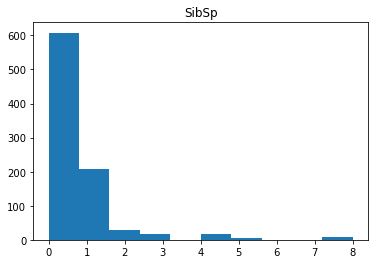

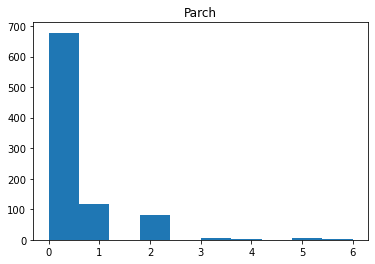

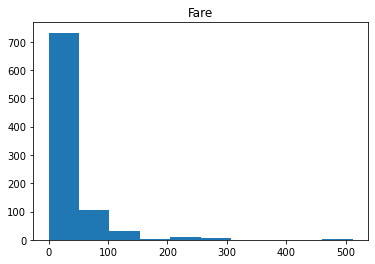

In [8]:
#Young/Old/Middle?
#distributions for all numeric variables 
for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

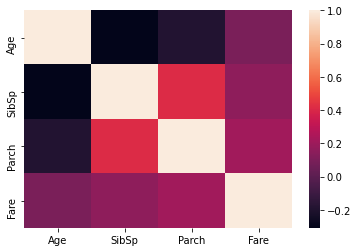

In [9]:
print(df_numeric.corr())
sns.heatmap(df_numeric.corr())

In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/Users/sriramvarmakalidindi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


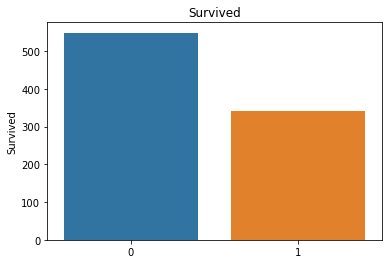

/Users/sriramvarmakalidindi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


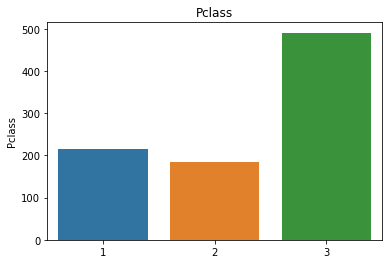

/Users/sriramvarmakalidindi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


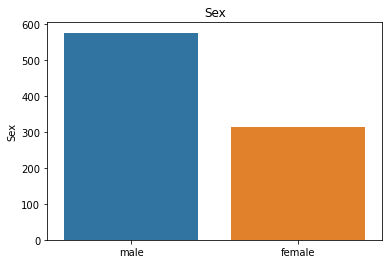

/Users/sriramvarmakalidindi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


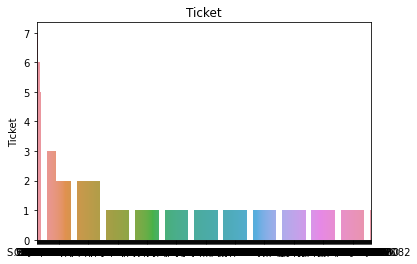

/Users/sriramvarmakalidindi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


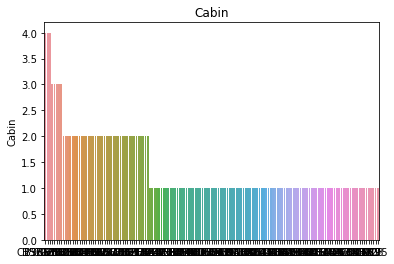

/Users/sriramvarmakalidindi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


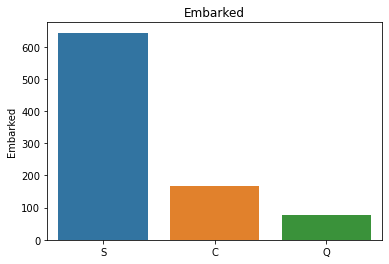

In [11]:
for i in df_categorical.columns:
    sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    plt.show()

In [12]:
#Female/Male?
#Comparing survival and each of these categorical variables 
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [13]:
#Step 4: Feature Engineering
#cabin_multiple
df_categorical.Cabin
training['cabin_mul'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
training['cabin_mul'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_mul, dtype: int64

In [14]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_mul',
               values = 'Ticket' ,aggfunc ='count')

cabin_mul,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
# n stands for null
# in this case we will treat null values like it's own category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [16]:
#understand ticket values better 
#numeric vs non numeric 
#numeric_ticket #ticket_letters
training['numeric_tic'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_let'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [17]:
#Rich/Poor?
##all rows in dataframe
#name_title
training.Name.head(50)
training['name_tit'] = training.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
training['name_tit'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Ms                1
Lady              1
Jonkheer          1
Mme               1
Don               1
the Countess      1
Capt              1
Name: name_tit, dtype: int64

In [18]:
#difference in numeric vs non-numeric tickets in survival rate
#numeric_ticket
pd.pivot_table(training,index='Survived',columns='numeric_tic', values = 'Ticket', aggfunc='count')

numeric_tic,0,1
Survived,,
0,142,407
1,88,254


In [19]:
#survival rate across different ticket types
#ticket_letters
pd.pivot_table(training,index='Survived',columns='ticket_let', values = 'Ticket', aggfunc='count')

ticket_let,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [20]:
#feature engineering on person's title 
#name_title
training.Name.head(50)
training['name_tit'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [21]:
training['name_tit'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Ms                1
Lady              1
Jonkheer          1
Mme               1
Don               1
the Countess      1
Capt              1
Name: name_tit, dtype: int64

(889,)

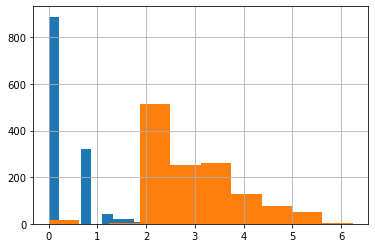

In [22]:
#Step 5: Data preprocessing for model

#create all categorical variables 
all_data['cabin_mul'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_tic'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_let'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_tit'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null 'embarked' rows.
all_data.dropna(subset=['Embarked'],inplace = True)

#tried logarithm normalize of sibsp 
all_data['normal_sibsp'] = np.log(all_data.SibSp+1)
all_data['normal_sibsp'].hist()

# logarithm normalize of fare 
all_data['normal_fare'] = np.log(all_data.Fare+1)
all_data['normal_fare'].hist()

# converted fare to category 
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','normal_fare','Embarked','cabin_adv','cabin_mul','numeric_tic','name_tit','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [23]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','normal_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','normal_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [24]:
#Step 6: Model Deployment
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC

In [25]:
#Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [26]:
#K Nearest Neighbour
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [27]:
#Support Vector Classifier
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [28]:
#Naive Bayes
nb = GaussianNB()
cv = cross_val_score(nb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [29]:
#Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [30]:
#Decision Tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [ ]:
#Therefore the accuracy of the models are:

#Logistic regression: 82.2%
#K Nearest Neighbour: 81.4%
#SVC: 83.3%
#Naive Bayes: 72.2%
#Random Forest: 80.2%
#Decision Tree: 77.7%

In [ ]:
#References:
#Numpy,pandas,seaborn,matplotlib - https://www.w3schools.com/
#Datasets - https://www.kaggle.com/datasets
#SomeOtherReferences - https://www.analyticsvidhya.com/blog/